# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS
from pf_widgets import WidgetUniverse, WidgetTransaction

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

## Portfolios
*Review portfolio settings*

In [3]:
PM.review('portfolio')

Portfolio: MMT, PER, WTR, LIQ, IRP, HANA, FCTR, KRX


In [4]:
PM.review_portfolio('WTR')

{'strategy': 'WTR', 'universe': 'UV_WTR'}

In [5]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR', strategy=True)

{'method_select': 'All',
 'method_weigh': 'Equally',
 'file': 'pf_wtr_static',
 'path': 'transaction'}

In [6]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'upload_type': 'price',
 'path': 'data'}

# Universe

In [7]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_IRP, UV_HANA, UV_FCTR


In [8]:
WidgetUniverse

## K200

In [9]:
k200 = PM.create_universe('UV_K200')

201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded


In [10]:
k200.portfolio_data

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'upload_type': 'price',
   'path': 'data'},
  'name': 'UV_K200'}}

In [11]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

## KRX

In [12]:
krx = PM.create_universe('UV_KRX')

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded


In [13]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [14]:
wtr = PM.create_universe('UV_WTR')

6 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded


In [15]:
PM.review_universe('UV_WTR')

{'universe': 'etf',
 'file': 'etfs_weather',
 'upload_type': 'price',
 'path': 'data'}

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

In [17]:
wtr.save()

ERROR: failed to save as etfs_weather_241112.csv exists


## FCTR

In [18]:
fctr = PM.create_universe('UV_FCTR')

7 assets from 2021-01-04 to 2024-11-08 uploaded.
df_prices loaded


In [19]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

In [20]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

## IRP
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8325&fundcode=8335
- https://www.kiwoomam.com/fund/KI0202020000M?parentfundcode=8370&fundcode=8380
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537380&childFundGb=2&childFundCd=53738P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537400&childFundGb=2&childFundCd=53740P
- https://investments.miraeasset.com/fund/view.do?fundGb=2&fundCd=537410&childFundGb=2&childFundCd=53741P
- https://www.hanwhawm.com/main/finance/fundInfo/FI141_2.cmd?p=500&item_cd=5102896

In [21]:
irp = PM.create_universe('UV_IRP')

Estimating price from "data/funds_irp.csv" ...
Max error of 14 conversions: 0.16 %
14 assets from 2017-07-31 to 2024-08-26 uploaded.
df_prices loaded
REMINDER: 9 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [22]:
irp.get_date_range().sort_values('end date')

,name,start date,end date,n
K55105BS5067,삼성한국형TDF2040증권투자신탁H[주식혼합-재간접형]C-Pe,2017-07-31,2024-08-26,2584
K55223BT1450,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e,2017-07-31,2024-08-26,2584
K55301BU5479,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e,2017-08-14,2024-08-26,2570
K55207BU0715,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe,2017-08-31,2024-08-26,2553
K55210BU2435,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re),2017-08-31,2024-08-26,2553
K55365BT3694,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2,2017-08-31,2024-08-26,2553
KR5223AE3357,kb퇴직연금배당증권자투자신탁(주식)C-E,2017-08-31,2024-08-26,2553
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,2017-09-20,2024-08-26,2533
K55301BU5453,미래에셋평생소득TIF혼합자산자투자신탁종류C-P2e,2017-09-29,2024-08-26,2524
K55203C53681,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe,2018-04-30,2024-08-26,2311


In [23]:
irp.performance('sharpe', 'year')

,name,daily_sharpe,monthly_sharpe,yearly_sharpe
K55301BU6139,미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e,0.779196,0.905514,0.600542
K55301BU5479,미래에셋전략배분TDF2045혼합자산자투자신탁 종류C-P2e,0.761174,0.897551,0.600273
K55365BT3694,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2,0.523945,0.635648,0.573647
K55213C51890,한화LIFEPLUSTDF2040증권자투자신탁(혼합-재간접형)C-RPe(퇴직연금),0.613093,0.748384,0.542374
K55223BT1450,KB온국민TDF2040증권투자신탁(주식혼합-재간접형)C-퇴직e,0.524394,0.636211,0.484719
K55210BU2435,신한마음편한TDF2040증권투자신탁[주식혼합-재간접형](종류C-re),0.562201,0.683774,0.478562
K55203C53681,대신KOSPI200인덱스증권자투자신탁(주식-파생형)CPe,0.443305,0.535309,0.475771
K55206C96311,키움키워드림TDF2045증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금),0.585596,0.617055,0.447164
K55206C95800,키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금),0.628952,0.641508,0.436946
K55207BU0715,교보악사파워인덱스증권자투자신탁1호(주식)C-Pe,0.383179,0.461339,0.417496


## HANA
- https://dis.kofia.or.kr

In [24]:
hana = PM.create_universe('UV_HANA')

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices loaded
KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: 4 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless


In [25]:
hana.get_date_range()

,name,start date,end date,n
KR5101888398,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e),2010-01-29,2024-07-31,5298
KR5370AP9956,AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce,2014-04-30,2024-07-31,3746
KR5236AS4826,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E,2014-05-30,2024-07-31,3716
K55306CV9946,다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce,2019-10-31,2024-07-31,1736


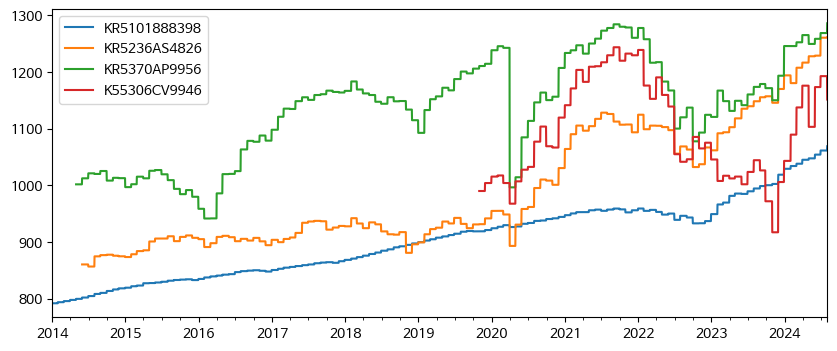

In [26]:
_ = hana.df_prices.loc['2014':].plot(figsize=(10,4))

## LIQ

In [27]:
# portfolio of past trading system to liquidate soon
tickers_liq = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [28]:
liq = PM.create_universe('UV_LIQ')

24 assets from 2021-01-04 to 2024-11-08 uploaded.
df_prices loaded


In [29]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #tickers_liq,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

## Additional Data

### Financial Ratio

In [3]:
WidgetUniverse

In [4]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-08 loaded


In [5]:
start = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start, **kw)

In [6]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [7]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded


# Performance

In [3]:
PM.review()

Portfolio: MMT, PER, WTR, LIQ, IRP, HANA, FCTR, KRX


In [4]:
#pf_list = ['MMT', 'PER', 'WTR', 'LIQ']
pf_list = ['PER', 'WTR']
pm = PM(pf_list)

PER:
201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded

WTR:
6 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-07-18 loaded



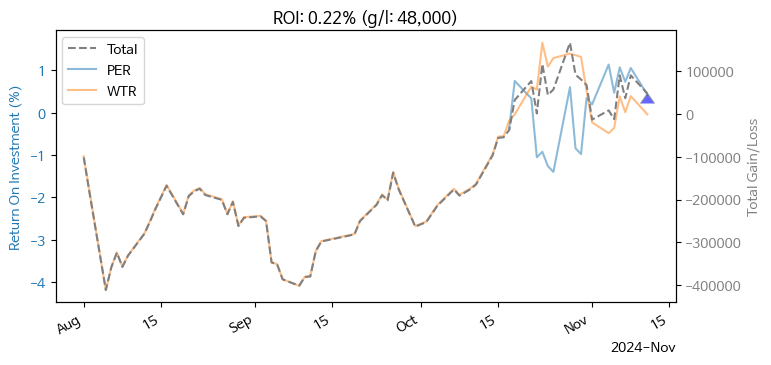

In [5]:
start_date='2024-08-01'
pm.plot(start_date=start_date)

In [6]:
pm.valuate()

,ROI,G/L
PER,0.004237,51905
WTR,-0.000405,-3980
Total,0.002172,47925


# Transaction

## MMT

In [42]:
pf_mmt = PM.create_portfolio('MMT')

201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


In [8]:
pf_mmt.portfolio_data['strategy']

{'data': {'method_select': 'Momentum',
  'method_weigh': 'Equally',
  'sort_ascending': False,
  'n_assets': 5,
  'lookback': '1y',
  'lag': '1w',
  'file': 'pf_k200_momentum',
  'path': 'transaction'},
 'name': 'MMT'}

In [9]:
pf_mmt.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                          
2024-10-08 267260      HD현대일렉트릭  321000            0    8   0.182   0.1742
           012450     한화에어로스페이스  364500            0    9   0.210   0.2225
           079550        LIG넥스원  243500           -3   11   0.192   0.1817
           003230          삼양식품  524000            0    6   0.216   0.2133
           011790           SKC  153600           20   20   0.200   0.2084
           042700         한미반도체  108100          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈   39350           -9    0     NaN   0.0000
2024-11-11 267260      HD현대일렉트릭  390000            0    8   0.200   0.1998
           012450     한화에어로스페이스  403500           -2    7   0.200   0.1941
           079550        LIG넥스원  266000            0   11   0.200   0.1973
           003230          삼양식품  563000           -1    5   0.200   0.2007
           064350          현대로템   63300           48   48   0.200   0.2081
           011790           SKC  122145          -20    0     NaN   0.0000

In [10]:
# run after editting record file
#_ = pf_mmt.update_record(save=True)

ROI -0.62%, Unrealized G/L -182,451 on 2024-11-11


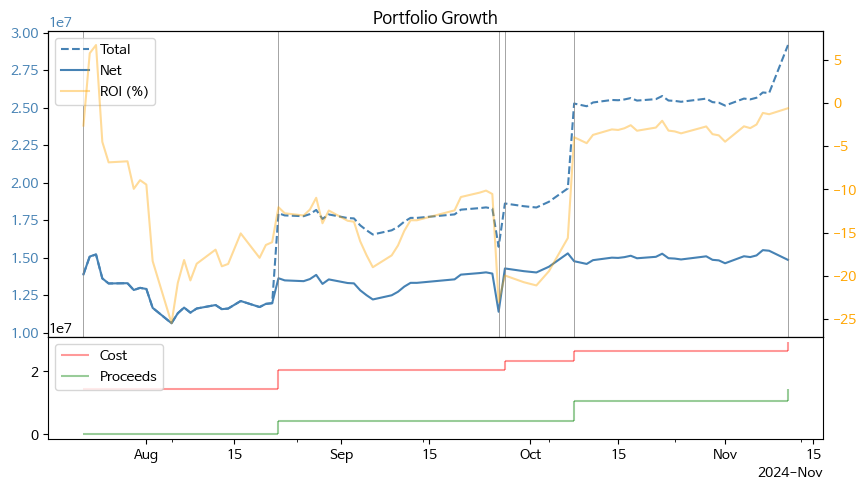

In [11]:
pf_mmt.valuate(figsize=(10,6))

In [12]:
#pf_mmt.performance(metrics=METRICS)

In [13]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [14]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
kw_liq = dict(
    #assets_to_sell= {'489790':34500},
    #assets_to_sell= '489790',
    #hold= True
)
_ = pf_mmt.transaction_pipeline(**kwargs_trs, **kw_liq)
pf_mmt.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-11-06 to 2024-11-04
ERROR: check the date as no new transaction
ROI -0.62%, Unrealized G/L -182,451 on 2024-11-11


name   price  transaction  net  weight  weight*
date       asset                                                          
2024-10-08 267260      HD현대일렉트릭  321000            0    8   0.182   0.1742
           012450     한화에어로스페이스  364500            0    9   0.210   0.2225
           079550        LIG넥스원  243500           -3   11   0.192   0.1817
           003230          삼양식품  524000            0    6   0.216   0.2133
           011790           SKC  153600           20   20   0.200   0.2084
           042700         한미반도체  108100          -21    0     NaN   0.0000
           489790  한화인더스트리얼솔루션즈   39350           -9    0     NaN   0.0000
2024-11-11 267260      HD현대일렉트릭  390000            0    8   0.200   0.1998
           012450     한화에어로스페이스  403500           -2    7   0.200   0.1941
           079550        LIG넥스원  266000            0   11   0.200   0.1973
           003230          삼양식품  563000           -1    5   0.200   0.2007
           064350          현대로템   63300           48   48   0.200   0.2081
           011790           SKC  122145          -20    0     NaN   0.0000

### Copy record to edit

In [11]:
date = '2024-09-27'
save = False

pf_mmt.copy_record(date, save=save)

Transaction record to 2024-09-27 loaded
ERROR: check the date as no new transaction


### Update record

In [ ]:
pf_mmt.update_record()

## KRX
*simulation*

In [16]:
pf_krx = PM.create_portfolio('KRX')

2712 assets from 2019-01-02 to 2024-10-08 uploaded.
df_prices loaded
ERROR from get_names: '287410'
Transaction record to 2024-10-02 loaded


In [17]:
pf_krx.view_record(-2)

name   price  transaction   net  weight  weight*
date       asset                                                     
2024-08-01 078860  엔에스이엔엠   10080         -217   109     0.2   0.2056
           016670     디모아    7070          156   156     0.2   0.2064
           159910   스킨앤스킨    1070         1034  1034     0.2   0.2070
           089030     테크윙   51400           21    21     0.2   0.2020
           196170    알테오젠  319000            3     3     0.2   0.1791
           042700   한미반도체  127300          -10     0     NaN   0.0000
           065350  신성델타테크   53800          -21     0     NaN   0.0000
           066790    씨씨에스    2850         -505     0     NaN   0.0000
           139050    BF랩스    2805         -530     0     NaN   0.0000
2024-10-02 078860  엔에스이엔엠    9700           30   139     0.2   0.2000
           016670     디모아    4725          130   286     0.2   0.2004
           033790      피노    9090          148   148     0.2   0.1995
           159910   스킨앤스킨     761          744  1778     0.2   0.2007
           196170    알테오젠  336000            1     4     0.2   0.1993
           089030     테크윙   36500          -21     0     NaN   0.0000

ROI -12.86%, Unrealized G/L -4,042,804 on 2024-10-08


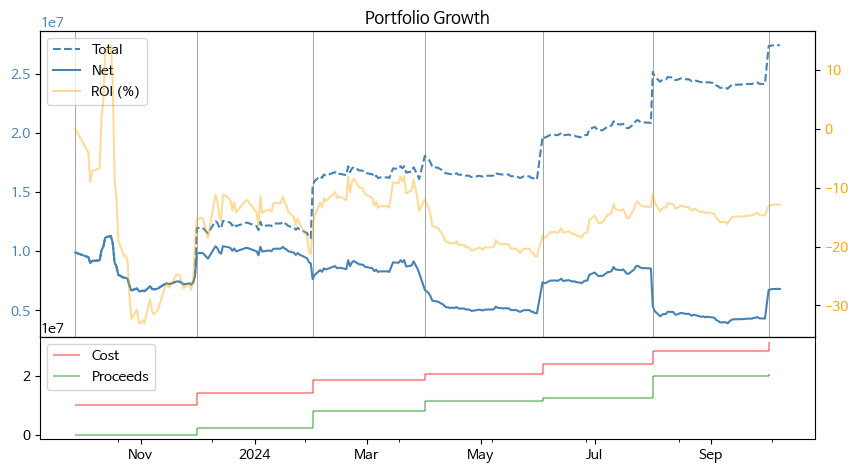

In [18]:
pf_krx.valuate()

In [19]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 assets selected by Total return from 2023-09-08 to 2024-09-06
Weights of assets determined by Equal weights.
Mean absolute error of weights: 4 %
ROI -12.80%, Unrealized G/L -4,042,804 on 2024-10-08
Set save=True to save transaction record


name   price  transaction   net weight weight*
date       asset                                                   
2024-10-02 078860  엔에스이엔엠    9700           30   139    0.2     0.2
           016670     디모아    4725          130   286    0.2  0.2004
           033790      피노    9090          148   148    0.2  0.1995
           159910   스킨앤스킨     761          744  1778    0.2  0.2007
           196170    알테오젠  336000            1     4    0.2  0.1993
           089030     테크윙   36500          -21     0    NaN     0.0
2024-10-08 078860    None    9390            6   145  0.200  0.2079
           016670    None    4865           -6   280  0.200  0.2080
           033790    None    9040            2   150  0.200  0.2070
           196170    None  369000           -1     3  0.200  0.1690
           159910    None     734           79  1857  0.200  0.2081

## PER

In [3]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 201 stocks from 2023-01-02 to 2024-11-08 loaded


In [4]:
pf_per = PM.create_portfolio('PER', df_additional=df_ratio)

201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


In [5]:
pf_per.portfolio_data

{'universe': {'data': {'universe': 'kospi200',
   'file': 'kospi200_prices',
   'upload_type': 'price',
   'path': 'data'},
  'name': 'UV_K200'},
 'strategy': {'data': {'method_select': 'F-ratio',
   'method_weigh': 'Equally',
   'sort_ascending': True,
   'n_assets': 20,
   'lookback': '2m',
   'lag': 0,
   'file': 'pf_k200_per',
   'path': 'transaction'},
  'name': 'PER'}}

In [6]:
pf_per.view_record(-2)

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-10-17 010060   OCI홀딩스   66700           14   14    0.20   0.1892
           003030   세아제강지주  164450            6    6    0.20   0.1999
           009970  영원무역홀딩스   89000           11   11    0.20   0.1983
           016380     KG스틸    6600          154  154    0.20   0.2059
           047040     대우건설    3820          267  267    0.20   0.2066
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [7]:
#pf_per.update_record()
#pf_per.view_record(-2)

ROI 0.42%, Unrealized G/L 51,905 on 2024-11-11


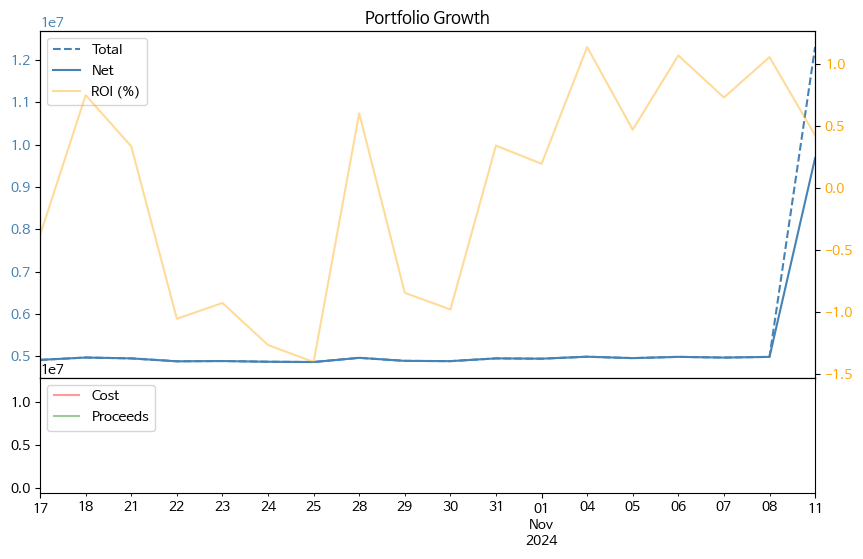

In [8]:
pf_per.valuate()

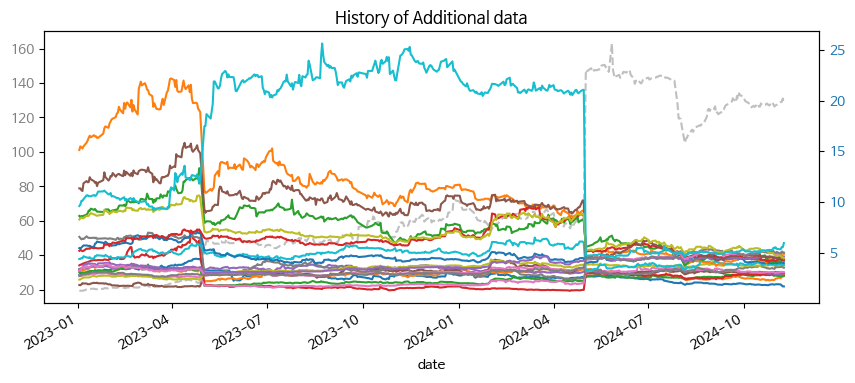

In [10]:
_ = pf_per.check_additional(plot=True, figsize=(10,4), legend=False)

In [11]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [12]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)

_ = pf_per.transaction_pipeline(**kwargs_trs)
pf_per.view_record(-2)

Liquidation set to None
ERROR: no ratio for "['2024-11-11'] not in index"


name   price  transaction  net  weight  weight*
date       asset                                                     
2024-10-17 010060   OCI홀딩스   66700           14   14    0.20   0.1892
           003030   세아제강지주  164450            6    6    0.20   0.1999
           009970  영원무역홀딩스   89000           11   11    0.20   0.1983
           016380     KG스틸    6600          154  154    0.20   0.2059
           047040     대우건설    3820          267  267    0.20   0.2066
2024-11-11 010060   OCI홀딩스   59800           -6    8    0.05   0.0497
           003030   세아제강지주  193300           -4    2    0.05   0.0402
           009970  영원무역홀딩스   85700           -6    5    0.05   0.0446
           016380     KG스틸    6590          -78   76    0.05   0.0521
           047040     대우건설    3635         -127  140    0.05   0.0529
           088350     한화생명    2865          180  180    0.05   0.0536
           078930       GS   41600           12   12    0.05   0.0519
           111770     영원무역   40150           12   12    0.05   0.0501
           139130  DGB금융지주    8250           63   63    0.05   0.0540
           005830   DB손해보험  106900            4    4    0.05   0.0445
           001450     현대해상   29750           17   17    0.05   0.0526
           009900     명신산업   13770           36   36    0.05   0.0515
           241560     두산밥캣   40000           13   13    0.05   0.0541
           000270       기아   93600            5    5    0.05   0.0487
           024110     기업은행   14570           35   35    0.05   0.0530
           005850      에스엘   31350           16   16    0.05   0.0522
           316140   우리금융지주   16080           32   32    0.05   0.0535
           138930  BNK금융지주    9430           55   55    0.05   0.0539
           005380      현대차  209500            2    2    0.05   0.0436
           017800   현대엘리베이   46300            9    9    0.05   0.0433

In [13]:
#pf_per.update_record()

## WTR
*modified all weather*

In [3]:
pf_wtr = PM.create_portfolio('WTR')

6 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-07-18 loaded


ROI -0.04%, Unrealized G/L -3,980 on 2024-11-11


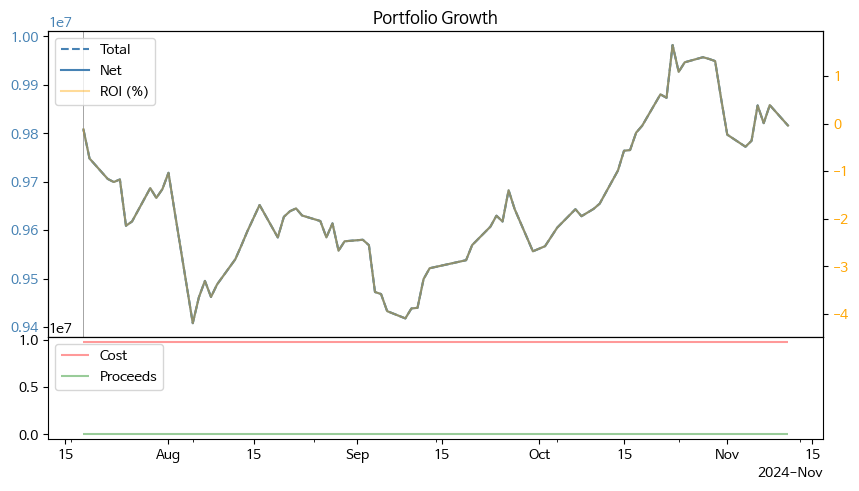

In [4]:
pf_wtr.valuate()

In [5]:
#pf_wtr.performance(metrics=METRICS)

In [6]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [7]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2)

Liquidation set to None
6 assets selected by All from 2024-11-11 to 2024-11-11
Weights of assets determined by Equal weights.
Mean absolute error of weights: 1 %
ROI -0.04%, Unrealized G/L -3,980 on 2024-11-11
Set save=True to save transaction record


name   price  transaction  net weight  \
date       asset                                                           
2024-07-18 069500             KODEX 200   39085           42   42  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14  0.167   
           148070          KOSEF 국고채10년  114910           14   14  0.167   
           379800      KODEX 미국S&P500TR   17625           94   94  0.167   
           411060            ACE KRX금현물   15715          106  106  0.167   
           284430        KODEX 200미국채혼합   13440          124  124  0.167   
2024-11-11 069500             KODEX 200   33530            6   48  0.167   
           273130  KODEX 종합채권(AA-이상)액티브  114640            0   14  0.167   
           148070          KOSEF 국고채10년  116745            0   14  0.167   
           379800      KODEX 미국S&P500TR   19115           -9   85  0.167   
           411060            ACE KRX금현물   16950          -10   96  0.167   
           284430        KODEX 200미국채혼합   12700            4  128  0.167   

                  weight*  
date       asset           
2024-07-18 069500   0.167  
           273130   0.161  
           148070   0.164  
           379800   0.169  
           411060    0.17  
           284430    0.17  
2024-11-11 069500  0.1655  
           273130  0.1650  
           148070  0.1680  
           379800  0.1670  
           411060  0.1673  
           284430  0.1671

## LIQ

In [31]:
pf_liq = PM.create_portfolio('LIQ')

24 assets from 2021-01-04 to 2024-11-07 uploaded.
df_prices loaded
Transaction record to 2024-01-03 loaded


Portfolio value 3,266,481, Profit -50.8% on 2024-11-07


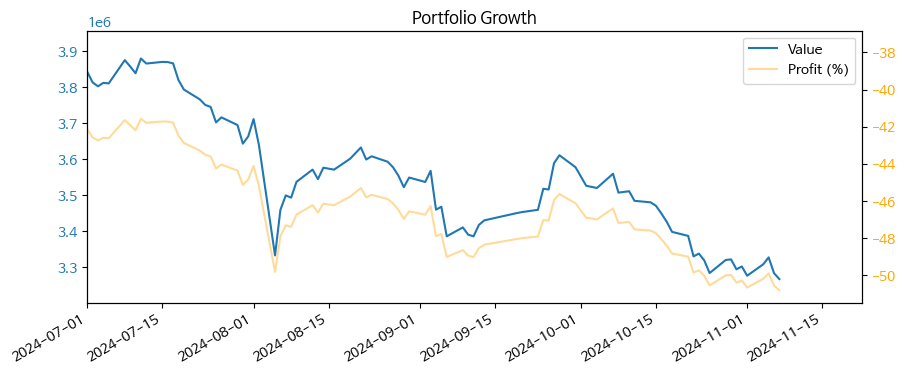

In [32]:
#date=None
date='2024-07-01'
pf_liq.valuate(start_date=date)

In [33]:
pf_liq.view_record()

name   price  transaction  net  weight  weight*
date       asset                                                     
2024-01-03 011780     금호석유  171000            2    2     NaN   0.0515
           066570     LG전자  122500            2    2     NaN   0.0369
           035890     서희건설    1800          166  166     NaN   0.0450
           040420  정상제이엘에스    7970           37   37     NaN   0.0444
           140520     대창스틸    3250           90   90     NaN   0.0440
           072990    에이치시티   15900           18   18     NaN   0.0431
           091580    상신이디피   16800           18   18     NaN   0.0455
           011200      HMM   26350           11   11     NaN   0.0436
           002220     한일철강    3130           95   95     NaN   0.0448
           006650     대한유화  181500            1    1     NaN   0.0273
           136490       선진   12700           23   23     NaN   0.0440
           064550    바이오니아   49650            6    6     NaN   0.0449
           460860     동국제강   18723            8    8     NaN   0.0226
           040910     아이씨디   12200           24   24     NaN   0.0441
           024950   삼천리자전거    9770           30   30     NaN   0.0441
           900070   글로벌에스엠    1080          277  277     NaN   0.0450
           036580      팜스코    6090           49   49     NaN   0.0449
           184230  SGA솔루션즈    1315          228  228     NaN   0.0451
           460850     동국씨엠   18055            5    5     NaN   0.0136
           016250  SGC E&C   46000            6    6     NaN   0.0416
           001230    동국홀딩스   24044            2    2     NaN   0.0072
           049470      SGA    1115          269  269     NaN   0.0452
           217820    원익피앤이   12518           22   22     NaN   0.0415
           109960   AP헬스케어    3790          158  158     NaN   0.0902

## IRP

In [34]:
selected = ['K55301BU6139', 'K55206C95800']

In [35]:
pf_irp = PM.create_portfolio('IRP', assets=selected)

Estimating price from "data/funds_irp.csv" ...
Max error of 14 conversions: 0.16 %
14 assets from 2017-07-31 to 2024-08-26 uploaded.
df_prices loaded
REMINDER: 9 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Transaction record to 2024-06-19 loaded


Portfolio value 9,963,967, Profit -0.3% on 2024-08-26


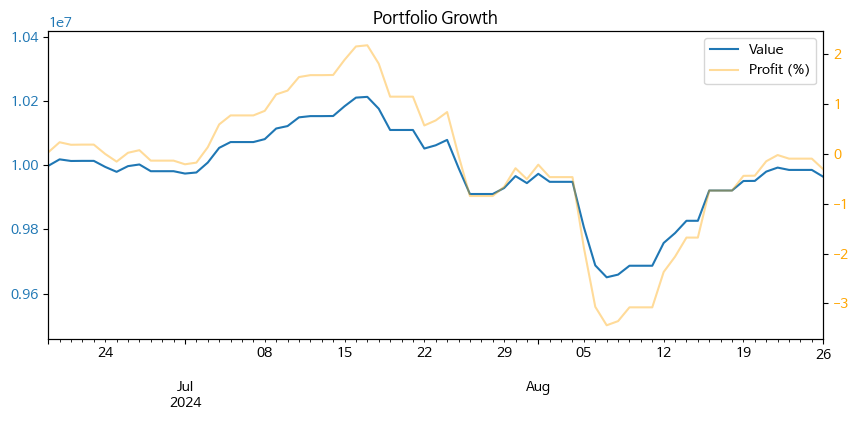

In [36]:
pf_irp.valuate()

In [37]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [38]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_irp.transaction_pipeline(**kwargs)
pf_irp.view_record()

Liquidation set to None
2 assets selected by Selected from 2024-08-26 to 2024-08-26
Weights of assets determined by Equal weights.
Mean absolute error of weights: 0 %
Portfolio value 9,962,573, Profit -0.3% on 2024-08-26
Set save=True to save transaction record


name  price  \
date       asset                                                            
2024-06-19 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1595   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1367   
2024-08-26 K55301BU6139            미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e   1576   
           K55206C95800  키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)   1374   

                         transaction   net weight weight*  
date       asset                                           
2024-06-19 K55301BU6139         3132  3132    0.5     0.5  
           K55206C95800         3657  3657    0.5     0.5  
2024-08-26 K55301BU6139           27  3159  0.500  0.5000  
           K55206C95800          -32  3625  0.500  0.5000

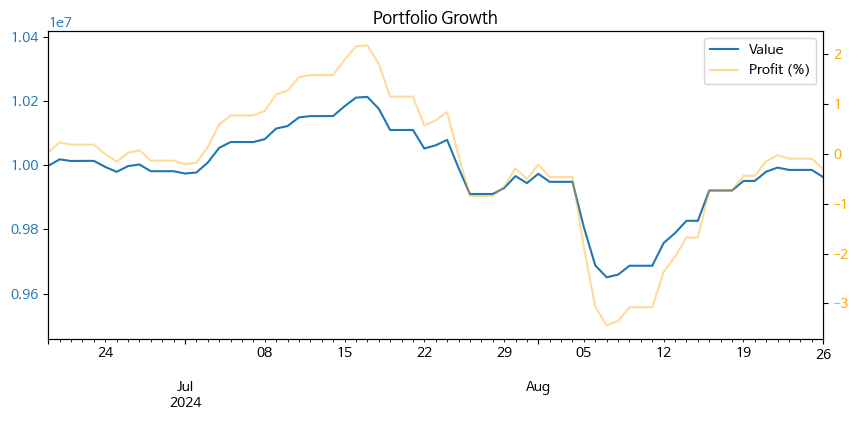

In [39]:
pf_irp.plot()

In [40]:
pf_irp.performance(metrics=METRICS)

,IRP
start,2024-06-19
end,2024-08-26
total_return,-0.003532
cagr,-0.018825
calmar,-0.342151
max_drawdown,-0.055021
avg_drawdown,-0.029718
avg_drawdown_days,26.0
daily_vol,0.059014
daily_sharpe,-0.193009


## HANA

In [41]:
pf_hana = PM.create_portfolio('HANA')

Estimating price from "data/funds_kebhana.csv" ...
  error: -0.00 %
  error: 0.01 %
  error: -0.00 %
  error: 0.00 %
4 assets from 2010-01-29 to 2024-07-31 uploaded.
df_prices loaded
KR5101888398: 12
KR5236AS4826: 12
KR5370AP9956: 12
K55306CV9946: 12
REMINDER: 4 equities converted to daily (days in year: 365)
Daily metrics in Performance statistics must be meaningless
Transaction record to 2024-07-31 loaded


In [42]:
pf_hana.valuate()

Portfolio value 9,997,329, Profit 0.1% on 2024-07-31
ERROR: need more data to plot


In [43]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [44]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

Liquidation set to None
4 assets selected by All from 2024-07-31 to 2024-07-31
ERROR: check the date as no new transaction
Portfolio value 9,997,329, Profit 0.1% on 2024-07-31


name  price  \
date       asset                                                        
2024-07-31 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)   1068   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E   1260   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce   1285   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce   1151   

                         transaction   net  weight  weight*  
date       asset                                             
2024-07-31 KR5101888398         4699  4699   0.502    0.502  
           KR5236AS4826         1920  1920   0.242    0.242  
           KR5370AP9956         1448  1448   0.186    0.186  
           K55306CV9946          602   602   0.069    0.069

In [45]:
pf_hana.plot()

ERROR: need more data to plot


In [46]:
pf_hana.performance(metrics=METRICS)

ERROR: Need more data to measure


# testing

In [71]:
from datetime import datetime

def valuate(self, date=None, print_msg=True, plot=True, **kw_plot):
    """
    calc cashflow, portfolio value and profit/loss of self.record or self.df_rec
    date_format: self.date_format
    """
    cols_record = self.cols_record
    col_prc = cols_record['prc']
    col_trs = cols_record['trs']
    col_net = cols_record['net']
    date_format = self.date_format
    
    # get latest record
    df_rec = self._check_result()
    if df_rec is None:
        return None
    
    # update price data by adding assets not in the universe if existing
    #df_prices = self._update_universe(df_rec, msg=print_msg)
    df_prices = self._update_universe(df_rec, msg=False)

    # check date by price data
    date = df_prices.loc[:date].index.max()
    date_ft = df_rec.index.get_level_values(0).min()
    if date_ft > date:
        dt = date.strftime(date_format)
        return print(f'ERROR: No transaction before {dt}')
    
    # get record to date
    df_rec = df_rec.loc[:date]
    date_lt = df_rec.index.get_level_values(0).max()
    
    # cost & gain on date. see _calc_cashflow_history for net cf history
    df = df_rec.loc[df_rec[col_trs]>0]
    cost = df[col_prc].mul(df[col_trs]).sum()
    df = df_rec.loc[df_rec[col_trs]<0]
    gain = df[col_prc].mul(df[col_trs]).mul(-1).sum()
    
    # calc value
    n_assets = df_rec.loc[date_lt, col_net]
    val = n_assets.mul(df_prices.loc[date, n_assets.index]).sum().astype(int)

    # calc roi
    roi = (val + gain) / cost - 1
    
    if print_msg:
        dt = date.strftime(date_format)
        print(f'Return on Investment: {roi:.2%} on {dt}')

    if plot:
        self.plot(msg_cr=False, **kw_plot)
    else:
        return (cost, gain, val)



In [72]:
valuate(pf_mmt, '2024-11-12', plot=False)

Return on Investment: -0.62% on 2024-11-11


(29349501, 14322250, 14844800)

In [36]:
testing = valuate(pf_mmt, '2024-11-12', plot=False)

In [37]:
(df_rec, date, col_prc, col_trs, col_net, df_prices) = testing

In [61]:
df_rec = df_rec.loc[:date]
date_lt = df_rec.index.get_level_values(0).max()

# cost & gain on date. see _calc_cashflow_history for net cf history
df = df_rec.loc[df_rec[col_trs]>0]
cost = df[col_prc].mul(df[col_trs]).sum()
df = df_rec.loc[df_rec[col_trs]<0]
gain = df[col_prc].mul(df[col_trs]).mul(-1).sum()

# calc value
n_assets = df_rec.loc[date_lt, col_net]
val = n_assets.mul(df_prices.loc[date, n_assets.index]).sum().astype(int)

# calc roi
roi = (val + gain) / cost - 1
roi

-0.006216494106663029

In [56]:
df = df_rec.loc[df_rec[col_trs]>0]
df

name   price  transaction  net  weight  weight*
date       asset                                                          
2024-07-22 003230          삼양식품  637000            5    5   0.227   0.2234
           267260      HD현대일렉트릭  314000            9    9   0.198   0.1982
           042700         한미반도체  149000           20   20   0.205   0.2090
           000150            두산  200000           13   13   0.189   0.1824
           010120   LS ELECTRIC  222000           12   12   0.181   0.1869
2024-08-22 003230          삼양식품  509000            1    6   0.217   0.2228
           012450     한화에어로스페이스  282500           10   10   0.206   0.2061
           079550        LIG넥스원  193000           14   14   0.199   0.1971
           042700         한미반도체  123100            1   21   0.186   0.1886
2024-09-27 012450     한화에어로스페이스  282588            9    9     NaN   0.1826
           489790  한화인더스트리얼솔루션즈   31301            9    9     NaN   0.0202
2024-10-08 011790           SKC  153600           20   20   0.200   0.2084
2024-11-11 064350          현대로템   63300           48   48   0.200   0.2081

In [58]:
df_rec.loc[date_lt]

,name,price,transaction,net,weight,weight*
asset,,,,,,
267260,HD현대일렉트릭,390000,0,8,0.2,0.1998
012450,한화에어로스페이스,403500,-2,7,0.2,0.1941
079550,LIG넥스원,266000,0,11,0.2,0.1973
003230,삼양식품,563000,-1,5,0.2,0.2007
064350,현대로템,63300,48,48,0.2,0.2081
011790,SKC,122145,-20,0,NaN,0.0000


In [62]:
val + gain

29167050

In [49]:
cost

29349501

14322250

# testing

In [3]:
pf_mmt = PM.create_portfolio('MMT')

201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


ROI -0.62%, Unrealized G/L -182,451 on 2024-11-11


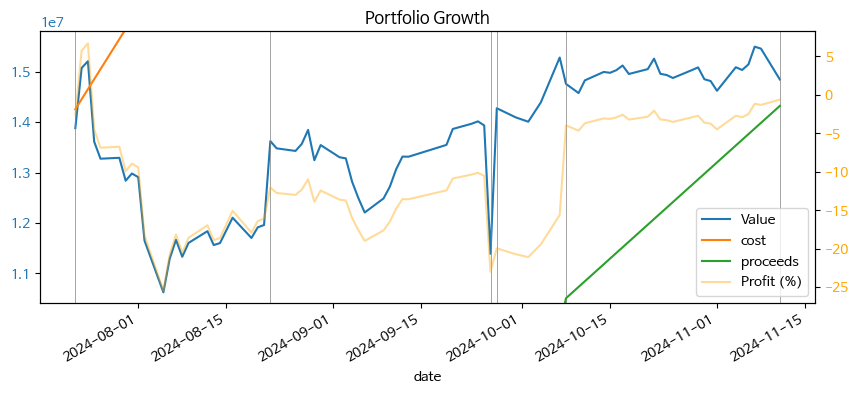

In [4]:
pf_mmt.valuate()

In [5]:
pf_mmt.record
pf_mmt._calc_cashflow_history(pf_mmt.record)

,cost,proceeds
date,,
2024-07-22,14255000,0.0
2024-08-22,20414100,4329600.0
2024-09-27,23239101,4329600.0
2024-10-08,26311101,10509350.0
2024-11-11,29349501,14322250.0


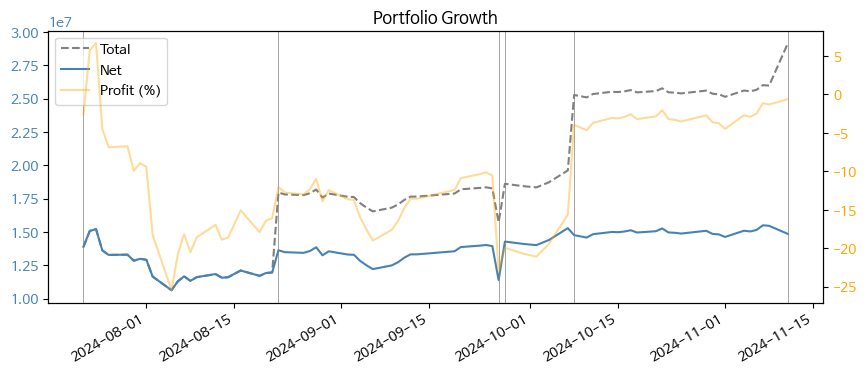

In [72]:
from pf_utils import mldate, set_matplotlib_twins
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl


def set_matplotlib_twins(ax1, ax2, legend=True, colors=None):
    """
    colors: list of color for ax1 and ax2
    """
    axes = [ax1, ax2]
    # set tick color
    colors = [x.get_lines()[0].get_color() for x in axes] if colors is None else colors
    _ = [x.tick_params(axis='y', labelcolor=colors[i]) for i, x in enumerate(axes)]
    # drop individual legends
    _ = [None if x.get_legend() is None else x.get_legend().remove() for x in axes]
    if legend:
        # set legend
        h1, h2 = [x.get_legend_handles_labels()[0] for x in axes]
        if len(h1)*len(h2) > 0:
            ax1.legend(handles=h1+h2)
    return (ax1, ax2)
    

def plot(self, start_date=None, end_date=None, 
         figsize=(10,4), legend=True, msg_cr=True, margin=0.02, 
         pnl_percent=True, pnl_log=False):
    """
    plot total value of portfolio
    """
    df_rec = self._check_result(msg_cr)
    if df_rec is None:
        return None
        
    col_net = 'Net'
    col_proceeds = 'proceeds'
    sr_val = self._calc_value_history(df_rec, self.name, msg=True).rename(col_net)
    if (sr_val is None) or (len(sr_val)==1):
        return print('ERROR: need more data to plot')

    df_cf = self._calc_cashflow_history(df_rec) # cashflow
    sr_prf = self._calc_profit(sr_val, df_cf, pnl_percent, pnl_log) # profit
    # total: value + proceeds
    sr_tot = (df_cf.join(sr_val, how='right').ffill()
              .apply(lambda x: x[col_net] + x[col_proceeds], axis=1))

    func = lambda x: x.loc[start_date:end_date]
    sr_tot = func(sr_tot)
    sr_val = func(sr_val)
    sr_prf = func(sr_prf)
    
    # transaction dates
    dates_trs = func(df_rec).index.get_level_values(0).unique()
        
    # plot historical of portfolio value
    line_tot = {'c':'gray', 'ls':'--'}
    ax1 = sr_tot.plot(label='Total', title='Portfolio Growth', figsize=figsize, **line_tot)
    _ = sr_val.plot(ax=ax1, c='steelblue')
    ax1.vlines(dates_trs, 0, 1, transform=ax1.get_xaxis_transform(), lw=0.5, color='grey')
    
    # plot profit history
    label = 'Profit'
    label = f'{label} (%)' if pnl_percent else label
    ax2 = sr_prf.plot(ax=ax1.twinx(), label=label, alpha=0.4, color='orange')
    # set env for the twins
    _ = set_matplotlib_twins(ax1, ax2, legend=legend, colors=('steelblue', 'orange'))
    return None



#plot(pf_mmt, '2024-10-01')
plot(pf_mmt)

# testing

In [85]:
def _plot_cashflow(self, ax, sr_cashflow_history, date=None, 
                   label='Cash Flows', alpha=0.4, color='g'):
    sr_cashflow_history = sr_cashflow_history.loc[:date]
    df_cf = sr_cashflow_history.rename('y').rename_axis('x1').reset_index()
    df_cf = df_cf.join(df_cf.x1.shift(-1).rename('x2')).apply(lambda x: x if date is None else x.fillna(date))
    df_cf = df_cf[['y', 'x1', 'x2']]
    args_line = [x.to_list() for _, x in df_cf.iterrows()]
    _ = [ax.hlines(*args, color=color, alpha=alpha, label=label if i==0 else None) for i, args in enumerate(args_line)]
    
    df_cf = sr_cashflow_history.rename('y2').rename_axis('x').reset_index()
    df_cf = df_cf.join(df_cf.y2.shift(1).rename('y1')).dropna()
    df_cf = df_cf[['x', 'y1', 'y2']]
    args_line = [x.to_list() for _, x in df_cf.iterrows()]
    _ = [ax.vlines(*args, color=color, alpha=alpha) for args in args_line]

def plot_cashflow(self, date=None, df_rec=None, ax=None, figsize=(8,2), alpha=0.4, colors=('g', 'r')):
    df_rec = self._check_result() if df_rec is None else df_rec
    if df_rec is None:
        return None
         
    df_cf = self._calc_cashflow_history(df_rec)
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    _ = [self._plot_cashflow(ax, df_cf[x], date, label=x, color=colors[i]) for i, x in enumerate(df_cf.columns)]
    ax.legend()
    return ax




In [86]:
pf_mmt = PM.create_portfolio('MMT')

pf_mmt._plot_cashflow = lambda *a, **k: _plot_cashflow(pf_mmt, *a, **k)
pf_mmt.plot_cashflow = lambda *a, **k: plot_cashflow(pf_mmt, *a, **k)

201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


<Axes: >

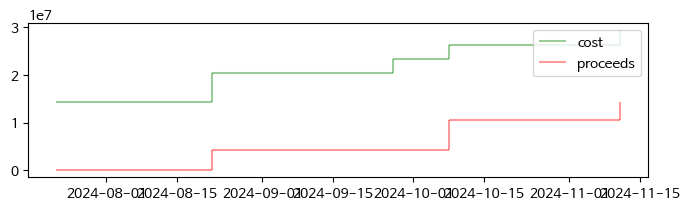

In [87]:
pf_mmt.plot_cashflow()

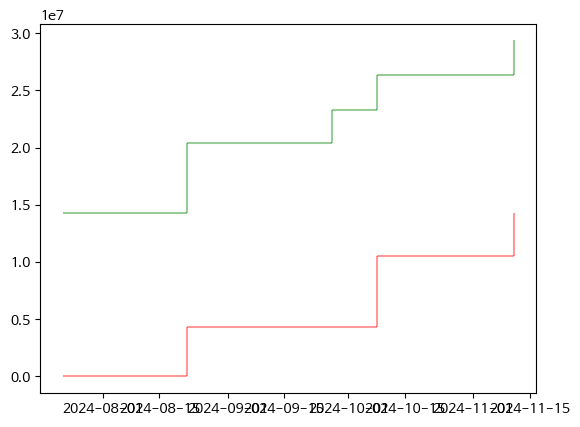

In [60]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
pf_mmt.plot_cashflow(ax=ax)

In [28]:
from matplotlib import pyplot as plt

df_cashflow_history = pf_mmt._calc_cashflow_history(pf_mmt.record)

fig, ax = plt.subplots()
#_ = _plot_cashflow(pf_mmt, ax, df_cashflow_history['cost'], '2024-11-20')
_ = _plot_cashflow(pf_mmt, ax, df_cashflow_history['cost'])
_ = _plot_cashflow(pf_mmt, ax, df_cashflow_history['proceeds'])

date
2024-07-22    14255000
2024-08-22    20414100
2024-09-27    23239101
2024-10-08    26311101
2024-11-11    29349501
Name: cost, dtype: int64

In [34]:
ymin = 0

sr_cashflow_history = df_cashflow_history['cost']
df_cf = sr_cashflow_history.rename('y2').rename_axis('x').reset_index()
df_cf = df_cf.join(df_cf.y2.shift(1).rename('y1')).dropna()
df_cf

,x,y2,y1
1,2024-08-22,20414100,14255000.0
2,2024-09-27,23239101,20414100.0
3,2024-10-08,26311101,23239101.0
4,2024-11-11,29349501,26311101.0


In [66]:
df_cashflow_history['cost']

date
2024-07-22    14255000
2024-08-22    20414100
2024-09-27    23239101
2024-10-08    26311101
2024-11-11    29349501
Name: cost, dtype: int64

In [68]:
df_cf['x']

1   2024-08-22
2   2024-09-27
3   2024-10-08
4   2024-11-11
Name: x, dtype: datetime64[ns]

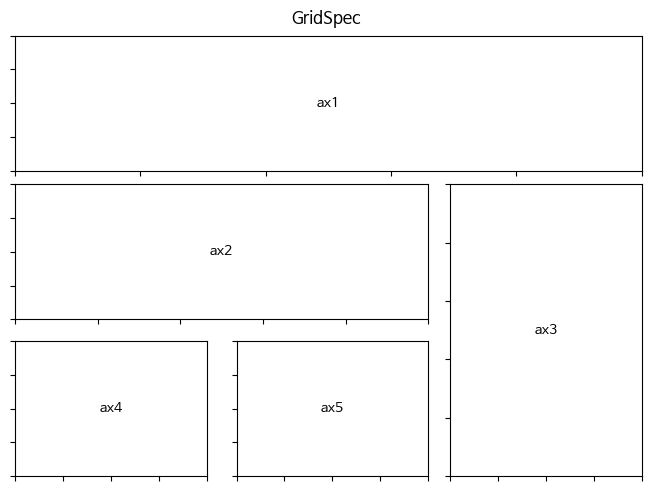

In [12]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained")

gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0])
ax5 = fig.add_subplot(gs[-1, -2])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

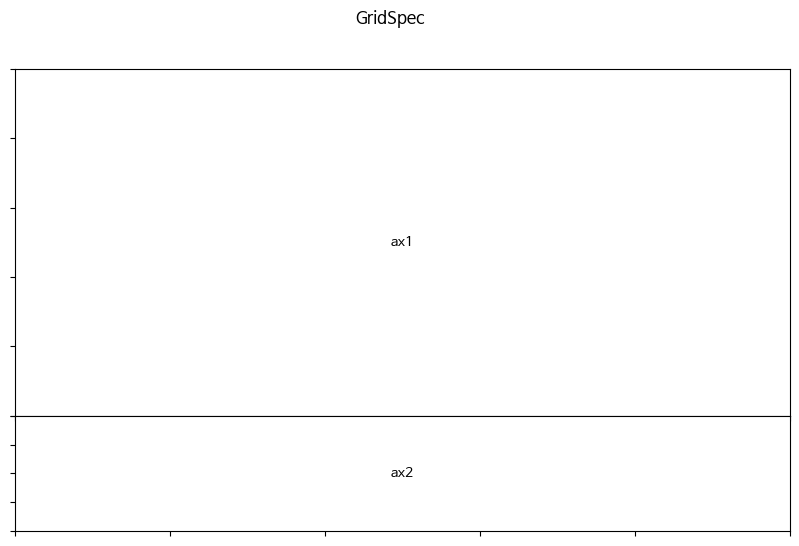

In [13]:
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

#fig = plt.figure(layout="constrained", figsize=(8,6))
fig = plt.figure(figsize=(10,6))
gs = GridSpec(4, 1, figure=fig, hspace=0)
ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, :])
ax1.sharex(ax2)

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

# testing

In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
from datetime import datetime

In [56]:
def plot(self, start_date=None, end_date=None, 
         figsize=(10,6), legend=True, height_ratios=(3,1), loc='upper left'
         msg_cr=True, roi=True, roi_log=False, cashflow=True):
    """
    plot total, net and profit histories of portfolio
    """
    df_rec = self._check_result(msg_cr)
    if df_rec is None:
        return None
        
    col_net = 'Net'
    col_prcd = 'proceeds'
    sr_val = self._calc_value_history(df_rec, self.name, msg=True).rename(col_net)
    if (sr_val is None) or (len(sr_val)==1):
        return print('ERROR: need more data to plot')

    df_cf = self._calc_cashflow_history(df_rec) # cashflow
    sr_prf = self._calc_profit(sr_val, df_cf, roi, roi_log) # profit

    # total: value + proceeds
    sr_tot = (df_cf.join(sr_val, how='right').ffill()
              .apply(lambda x: x[col_net] + x[col_prcd], axis=1))

    func = lambda x: x.loc[start_date:end_date]
    sr_tot = func(sr_tot)
    sr_val = func(sr_val)
    sr_prf = func(sr_prf)
    
    # transaction dates
    dates_trs = func(df_rec).index.get_level_values(0).unique()
        
    # plot historical of portfolio value
    ax1, ax2 = self._plot_get_axes(figsize=figsize, height_ratios=height_ratios)
    line_tot = {'c':'steelblue', 'ls':'--'}
    _ = sr_tot.plot(ax=ax1, label='Total', title='Portfolio Growth', figsize=figsize, **line_tot)
    _ = sr_val.plot(ax=ax1, c=line_tot['c'])
    ax1.vlines(dates_trs, 0, 1, transform=ax1.get_xaxis_transform(), lw=0.5, color='grey')
    
    # plot profit history
    label = f'ROI (%)' if roi else 'Unrealized G/L'
    ax1t = sr_prf.plot(ax=ax1.twinx(), label=label, alpha=0.4, color='orange')
    # set env for the twins
    _ = set_matplotlib_twins(ax1, ax1t, legend=legend, colors=('steelblue', 'orange'), loc=loc)

    # plot cashflow
    if cashflow:
        ax2 = self.plot_cashflow(df_rec=df_rec, start_date=start_date, end_date=end_date, ax=ax2)
    #return None
    return (ax1, ax2)


def _plot_get_axes(self, figsize=(10,6), height_ratios=(3, 1), sharex=True):
    """
    create axes for self.plot
    """
    fig = plt.figure(figsize=(10,6))
    gs = GridSpec(2, 1, figure=fig, hspace=0, height_ratios=height_ratios)
    ax1 = fig.add_subplot(gs[:-1, :])
    ax2 = fig.add_subplot(gs[-1, :])
    _ = ax1.sharex(ax2) if sharex else None
    return (ax1, ax2)


def plot_cashflow(self, df_rec=None, start_date=None, end_date=None,
                  ax=None, figsize=(8,2), alpha=0.4, colors=('r', 'g'),
                  labels=['Cost', 'Proceeds'], loc='upper left',):
    df_rec = self._check_result() if df_rec is None else df_rec
    if df_rec is None:
        return None
         
    df_cf = self._calc_cashflow_history(df_rec)
    df_cf = self._plot_cashflow_slice(df_cf, start_date, end_date)
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)
    kw = lambda i: {'label':labels[i], 'color':colors[i]}
    _ = [self._plot_cashflow(ax, df_cf[x], end_date, **kw(i)) for i, x in enumerate(df_cf.columns)]
    ax.legend(loc=loc)
    return ax  


def _plot_cashflow(self, ax, sr_cashflow_history, date=None, 
                   label='Cash Flows', alpha=0.4, color='g'):
    sr_cashflow_history = sr_cashflow_history.loc[:date]
    df_cf = sr_cashflow_history.rename('y').rename_axis('x1').reset_index()
    df_cf = (df_cf.join(df_cf.x1.shift(-1).rename('x2'))
             .apply(lambda x: x if date is None else x.fillna(date)))
    df_cf = df_cf[['y', 'x1', 'x2']]
    args_line = [x.to_list() for _, x in df_cf.iterrows()]
    _ = [ax.hlines(*args, color=color, alpha=alpha, label=label if i==0 else None) 
         for i, args in enumerate(args_line)]
    
    df_cf = sr_cashflow_history.rename('y2').rename_axis('x').reset_index()
    df_cf = df_cf.join(df_cf.y2.shift(1).rename('y1')).dropna()
    df_cf = df_cf[['x', 'y1', 'y2']]
    args_line = [x.to_list() for _, x in df_cf.iterrows()]
    _ = [ax.vlines(*args, color=color, alpha=alpha) for args in args_line]
        

def _plot_cashflow_slice(self, df_cf, start_date, end_date):
    """
    slice cashflow history
    """
    for x in (start_date, end_date):
        if x is not None:
            x = datetime.strptime(x, self.date_format) if isinstance(x, str) else x
            df_cf.loc[x] = None
    return df_cf.sort_index().ffill().fillna(0).loc[start_date:end_date]
    



In [57]:
pf_mmt = PM.create_portfolio('MMT')

201 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-11-11 loaded


In [39]:
import matplotlib.units as munits
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from datetime import date as datetime_date


converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime_date] = converter
munits.registry[datetime] = converter

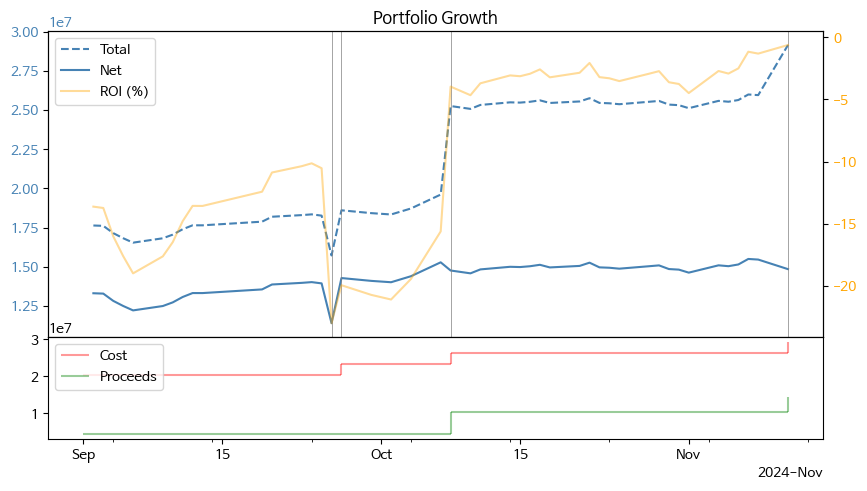

In [58]:
from pf_utils import set_matplotlib_twins

pf_mmt._plot_get_axes = lambda *a, **k: _get_axes(pf_mmt, *a, **k)
pf_mmt.plot_cashflow = lambda *a, **k: plot_cashflow(pf_mmt, *a, **k)
pf_mmt._plot_cashflow_slice = lambda *a, **k: _fill_cf(pf_mmt, *a, **k)

(ax1, ax2) = plot(pf_mmt, start_date='2024-09-01')
#(ax1, ax2) = plot(pf_mmt)

In [17]:
df_cf = pf_mmt._calc_cashflow_history(pf_mmt.record)
df_cf

,cost,proceeds
date,,
2024-07-22,14255000,0.0
2024-08-22,20414100,4329600.0
2024-09-27,23239101,4329600.0
2024-10-08,26311101,10509350.0
2024-11-11,29349501,14322250.0


In [18]:
from datetime import datetime
format_date = '%Y-%m-%d'

start_date = '2024-09-01'
end_date = '2024-12-01'
start_date = datetime.strptime(start_date, format_date)
end_date = datetime.strptime(end_date, format_date)

df_cf.loc[start_date] = None
df_cf.loc[end_date] = None
df_cf = df_cf.sort_index().ffill().fillna(0)
df_cf

,cost,proceeds
date,,
2024-07-22,14255000.0,0.0
2024-08-22,20414100.0,4329600.0
2024-09-01,20414100.0,4329600.0
2024-09-27,23239101.0,4329600.0
2024-10-08,26311101.0,10509350.0
2024-11-11,29349501.0,14322250.0
2024-12-01,29349501.0,14322250.0


In [19]:
df_cf

,cost,proceeds
date,,
2024-07-22,14255000.0,0.0
2024-08-22,20414100.0,4329600.0
2024-09-01,20414100.0,4329600.0
2024-09-27,23239101.0,4329600.0
2024-10-08,26311101.0,10509350.0
2024-11-11,29349501.0,14322250.0
2024-12-01,29349501.0,14322250.0


# testing

In [20]:
pf_wtr = PM.create_portfolio('WTR')

6 assets from 2021-01-04 to 2024-11-11 uploaded.
df_prices loaded
Transaction record to 2024-07-18 loaded


ROI -0.04%, Unrealized G/L -3,980 on 2024-11-11


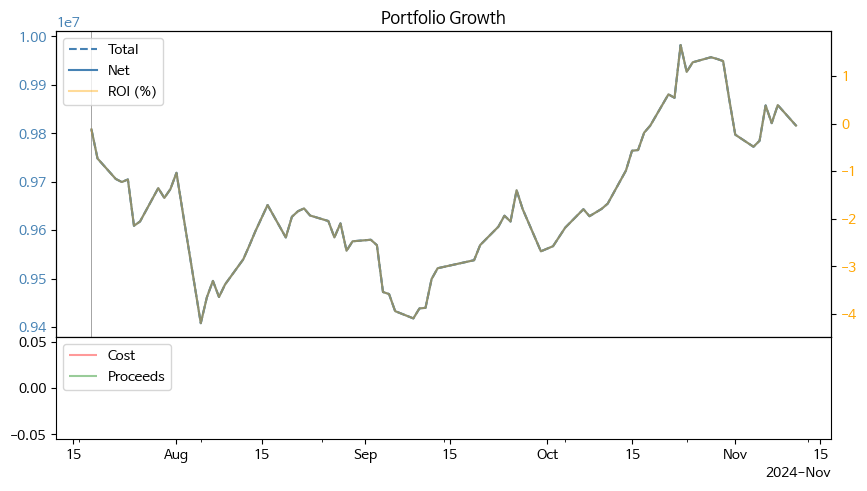

In [21]:
pf_wtr.valuate()

<Axes: >

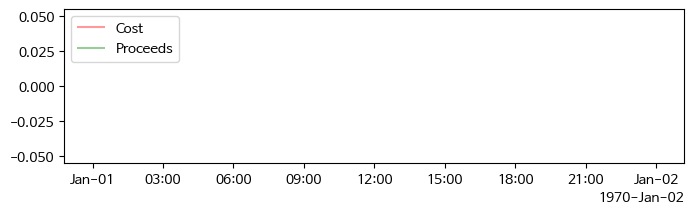

In [22]:
pf_wtr.plot_cashflow()

In [24]:
pf_wtr.view_record()

name   price  transaction  net  weight  \
date       asset                                                            
2024-07-18 069500             KODEX 200   39085           42   42   0.167   
           273130  KODEX 종합채권(AA-이상)액티브  112895           14   14   0.167   
           148070          KOSEF 국고채10년  114910           14   14   0.167   
           379800      KODEX 미국S&P500TR   17625           94   94   0.167   
           411060            ACE KRX금현물   15715          106  106   0.167   
           284430        KODEX 200미국채혼합   13440          124  124   0.167   

                   weight*  
date       asset            
2024-07-18 069500    0.167  
           273130    0.161  
           148070    0.164  
           379800    0.169  
           411060    0.170  
           284430    0.170

In [25]:
self = pf_wtr
self._calc_cashflow_history(self.record)

,cost,proceeds
date,,
2024-07-18,9819940,0.0


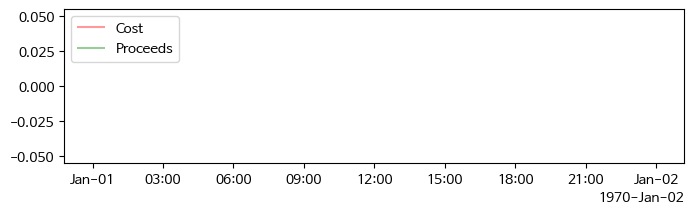

In [27]:
from matplotlib import pyplot as plt

#def plot_cashflow(self, 
df_rec=None
start_date=None
end_date=None
ax=None
figsize=(8,2)
alpha=0.4
colors=('r', 'g')
labels=['Cost', 'Proceeds']
loc='upper left'

df_rec = self._check_result() if df_rec is None else df_rec
if df_rec is None:
    pass #return None
     
df_cf = self._calc_cashflow_history(df_rec)
df_cf = self._plot_cashflow_slice(df_cf, start_date, end_date)
if ax is None:
    _, ax = plt.subplots(figsize=figsize)
kw = lambda i: {'label':labels[i], 'color':colors[i]}
_ = [self._plot_cashflow(ax, df_cf[x], end_date, **kw(i)) for i, x in enumerate(df_cf.columns)]
ax.legend(loc=loc)
#return ax  

In [29]:
[self._plot_cashflow(ax, df_cf[x], end_date, **kw(i)) for i, x in enumerate(df_cf.columns)]

[None, None]

In [68]:
self = pf_wtr
#self = pf_mmt
df_rec = self.record
#start_date, end_date = ('2024-07-18', '2024-11-11')
start_date, end_date = None, None

df_cf = self._calc_cashflow_history(df_rec)
df_cf = self._plot_cashflow_slice(df_cf, start_date, end_date)
df_cf

,cost,proceeds
date,,
2024-07-18,9819940,0.0


In [58]:
#def _plot_cashflow(

#sr_cashflow_history = df_cf['cost']
sr_cashflow_history = df_cf['proceeds']

date=None
label='Cash Flows'
alpha=0.4
color='g'

sr_cashflow_history = sr_cashflow_history.loc[:date]
df = sr_cashflow_history.rename('y').rename_axis('x1').reset_index()
df = (df.join(df.x1.shift(-1).rename('x2'))
         .apply(lambda x: x if date is None else x.fillna(date)))
df = df[['y', 'x1', 'x2']]
df

,y,x1,x2
0,0.0,2024-07-18,NaT


In [59]:
df = sr_cashflow_history.rename('y2').rename_axis('x').reset_index()
df = df.join(df.y2.shift(1).rename('y1')).dropna()
df = df[['x', 'y1', 'y2']]
df

,x,y1,y2


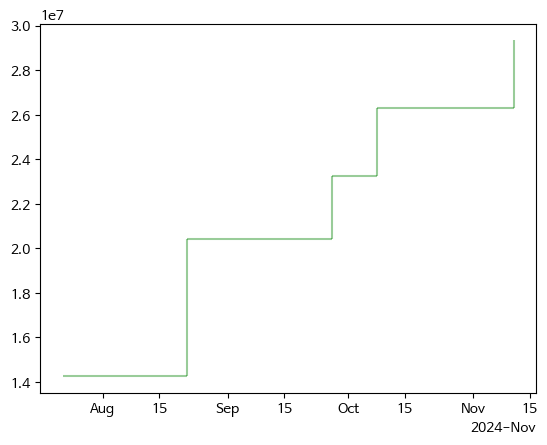

In [50]:
_, ax = plt.subplots()

args_line = [x.to_list() for _, x in df_cf.iterrows()]
_ = [ax.hlines(*args, color=color, alpha=alpha, label=label if i==0 else None) 
     for i, args in enumerate(args_line)]

df = sr_cashflow_history.rename('y2').rename_axis('x').reset_index()
df = df.join(df.y2.shift(1).rename('y1')).dropna()
df = df[['x', 'y1', 'y2']]
args_line = [x.to_list() for _, x in df_cf.iterrows()]
_ = [ax.vlines(*args, color=color, alpha=alpha) for args in args_line]

In [51]:
df_cf

,x,y1,y2
1,2024-08-22,14255000.0,20414100
2,2024-09-27,20414100.0,23239101
3,2024-10-08,23239101.0,26311101
4,2024-11-11,26311101.0,29349501


('2024-07-18', '2024-11-11')

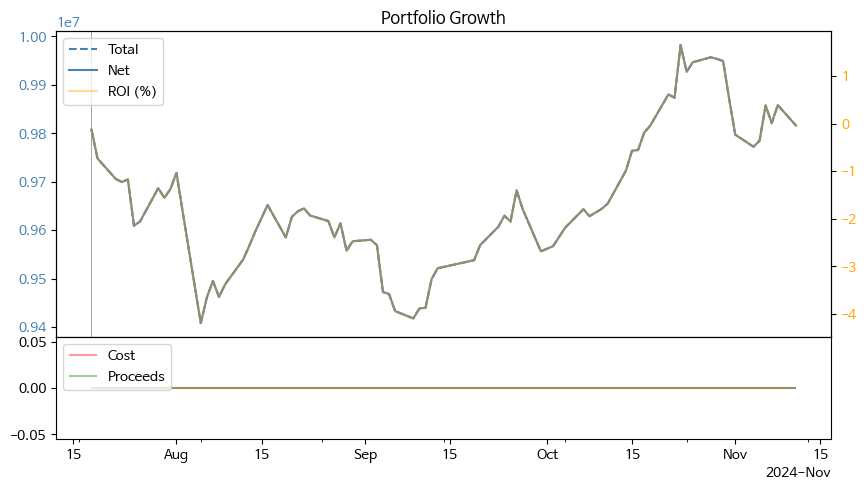

In [64]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pf_utils import set_matplotlib_twins, get_date_minmax

def plot(self, start_date=None, end_date=None, 
         figsize=(10,6), legend=True, height_ratios=(3,1), loc='upper left',
         msg_cr=True, roi=True, roi_log=False, cashflow=True):
    """
    plot total, net and profit histories of portfolio
    """
    df_rec = self._check_result(msg_cr)
    if df_rec is None:
        return None
        
    col_net = 'Net'
    col_prcd = 'proceeds'
    sr_val = self._calc_value_history(df_rec, self.name, msg=True).rename(col_net)
    if (sr_val is None) or (len(sr_val)==1):
        return print('ERROR: need more data to plot')

    df_cf = self._calc_cashflow_history(df_rec) # cashflow
    sr_prf = self._calc_profit(sr_val, df_cf, roi, roi_log) # profit

    # total: value + proceeds
    sr_tot = (df_cf.join(sr_val, how='right').ffill()
              .apply(lambda x: x[col_net] + x[col_prcd], axis=1))

    func = lambda x: x.loc[start_date:end_date]
    sr_tot = func(sr_tot)
    sr_val = func(sr_val)
    sr_prf = func(sr_prf)
    
    # transaction dates
    dates_trs = func(df_rec).index.get_level_values(0).unique()
        
    # plot historical of portfolio value
    ax1, ax2 = self._plot_get_axes(figsize=figsize, height_ratios=height_ratios)
    line_tot = {'c':'steelblue', 'ls':'--'}
    _ = sr_tot.plot(ax=ax1, label='Total', title='Portfolio Growth', figsize=figsize, **line_tot)
    _ = sr_val.plot(ax=ax1, c=line_tot['c'])
    ax1.vlines(dates_trs, 0, 1, transform=ax1.get_xaxis_transform(), lw=0.5, color='grey')
    
    # plot profit history
    label = f'ROI (%)' if roi else 'Unrealized G/L'
    ax1t = sr_prf.plot(ax=ax1.twinx(), label=label, alpha=0.4, color='orange')
    # set env for the twins
    _ = set_matplotlib_twins(ax1, ax1t, legend=legend, colors=('steelblue', 'orange'), loc=loc)

    # plot cashflow
    if cashflow:
        start, end = get_date_minmax(sr_val, self.date_format)
        ax2 = self.plot_cashflow(df_rec=df_rec, start_date=start, end_date=end, ax=ax2)
    #return None
    #return (ax1, ax2)
    return start, end


plot(pf_wtr)

In [65]:
start, end

NameError: name 'start' is not defined

In [72]:
None in df_ratio.index

False

In [71]:
df_ratio.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08'],
              dtype='datetime64[ns]', name='date', length=454, freq=None)